# Segmenting Image using k-Means and spectral clustering on colored and grayscale Images

##### Inspiration: While looking through kaggle, I found a pneumonia data set where you had to classify whether a patient had pneumonia or not. While a lot of the submitted kernels had classification accuracies of over 80%, it is definitely feasible to teach a computer to classify whether someone has pneumonia, there must still be a way for us humans to see X-Rays better. Now what if we wanted to help doctors see better, without having to see for them. Yes, you are probably thinking "Why let a human do it if a computer can differentiate between pixel differences worlds better?"

##### There are still others out there that feel as though ML / DL will be taking their jobs away, so maybe this will be a happy medium between technology and humans.

##### As a result, I will be using two clustering algorithms to cluster both colored and grayscaled images. First will be a cute doggo (colored) and lastly will be one normal patient X-Ray and a sick patient X-Ray. These results will not have an accuracy value attached to it, rather a qualitative / subjective result. We ultimately want to segment images as cleanly as possible. 

* I will be writing algorithms for k-means and spectral clustering from scratch, and will be comparing the results to packages from sklearn(kMeans) and sklearn(spectral clustering).

In [1]:
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from copy import deepcopy

In [2]:
# Euclidean Distance
def dist(a, b, ax = 1):
    return np.linalg.norm(a - b, axis = ax)

# Choosing random points from data
def randChoice(data, k):
    idx = np.random.randint(len(data), size = k)
    return data[idx, :]

In [3]:
#k-Means algorithm with a choice of error rate when to stop convergence
def kMeans(data, k, error_rate = 0):
    # Initial k points are random points in the data
    np.random.seed(100)
    cltr = randChoice(data, k)
    #Old Cluster that will be overwritten
    cltr_old = np.zeros(cltr.shape)
    #Labels of each row in data set - Returned val
    cltr_lbl = np.zeros(len(data))
    #Error rate that will be updated until reaches convergence rate
    err = dist(cltr, cltr_old, None)

    while err > error_rate:
        
        for i in range(len(data)):
            #Checks distance between every point and initial center
            dist_ = dist(data[i], cltr)
            #Takes lowest value distance and stores index
            cltr_ = np.argmin(dist_)
            #Stores index in cluster label array
            cltr_lbl[i] = cltr_
        cltr_old = deepcopy(cltr)
        
        for i in range(k):
            pts = [data[j] for j in range(len(data)) if cltr_lbl[j] == i]
            #Gets mean of each cluster to shift cluster center
            cltr[i] = np.mean(pts, axis = 0)
        err = dist(cltr, cltr_old, None)

        return cltr_lbl

In [4]:
#Spectral clustering algorithm
from sklearn.neighbors import radius_neighbors_graph
from sklearn.cluster import KMeans
from scipy.sparse import csgraph
import scipy

In [5]:
def spectralClus(data, k):
    
    a_mat = radius_neighbors_graph(data,0.4,mode='distance', metric='minkowski', p=2, metric_params=None, include_self=False)
    a_mat = a_mat.toarray()
    
    L = csgraph.laplacian(a_mat, normed=False)
    
    eig_val, eig_vect = scipy.sparse.linalg.eigs(L, k)
    X = eig_vect.real
    rows_norm = np.linalg.norm(X, axis=1, ord=2)
    Y = (X.T / rows_norm).T
    
    k_mean = KMeans(n_clusters = k)
    labels = k_mean.fit(Y, k).labels_
    
    return labels

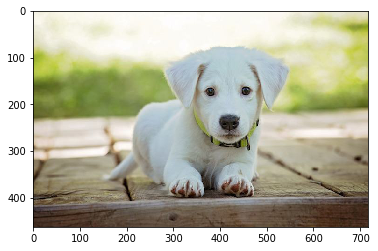

In [6]:
# Using PIL and matplotlib to show the heckin' cute doggo
im = Image.open('doggo.jpg')
doggo_ = im.copy()
doggo = np.asarray(im)
imshow(doggo)

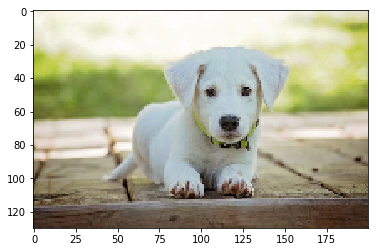

In [7]:
#Resizing image to make sure algorithms don't crash

re_dog = doggo_.resize([200, 130])

doggo_ = np.asarray(re_dog)
imshow(doggo_)

In [8]:
print(doggo_.shape)

(130, 200, 3)


In [9]:
#Flatten the array so it's easier to work with
reshape_dog = (doggo_.reshape(doggo_.shape[0]*doggo_.shape[1],3))
reshape_dog.shape

(26000, 3)

In [10]:
#Calling method to cluster cute doggo
dog_cluster = kMeans(reshape_dog, 3, 0)

In [11]:
#Reshaping the cluster labels to prep for concatenation 
dog_cluster = dog_cluster.reshape(len(dog_cluster),1)
#Concatenating doggo with labels
re_dog_clst = np.concatenate((reshape_dog, dog_cluster), axis = 1)

In [12]:
#Turning numPy array to DF so it's easier to work with
dog_df = pd.DataFrame(re_dog_clst)

In [13]:
#Turning all the other labels into black pixels
dog_df.loc[dog_df[3] != 1, [0,1,2]] = 0

In [14]:
#Dropping cluster label column and reverting back to numPy array
dog_df = dog_df.drop(columns = [3])
dog_df = dog_df.values

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


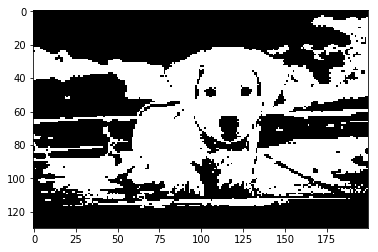

In [15]:
#Reshaping the doggo back to cute boy
dog_im = dog_df.reshape(doggo_.shape[0],doggo_.shape[1], 3)
imshow(np.asarray(dog_im))

### KMeans clustering using sklearn package

In [16]:
dog_kmeans = KMeans(n_clusters = 3, random_state=0).fit(reshape_dog)
kmeans_labels = dog_kmeans.labels_

In [17]:
#Reshaping the cluster labels to prep for concatenation 
kmeans_labels = kmeans_labels.reshape(len(kmeans_labels),1)
#Concatenating doggo with labels
re_dog_clst1 = np.concatenate((reshape_dog, kmeans_labels), axis = 1)

In [18]:
#Turning numPy array to DF so it's easier to work with
dog_df1 = pd.DataFrame(re_dog_clst1)

In [19]:
dog_df1.loc[dog_df1[3] != 0, [0,1,2]] = 0

In [20]:
#Dropping cluster label column and reverting back to numPy array
dog_df1 = dog_df1.drop(columns = [3])
dog_df1 = dog_df1.values

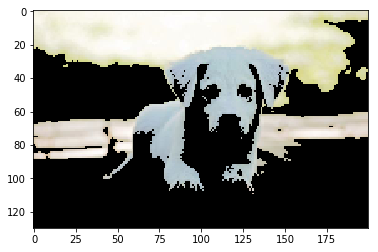

In [21]:
#Reshaping the doggo back to cute boy
dog_im1 = dog_df1.reshape(doggo_.shape[0],doggo_.shape[1], 3)
imshow(np.asarray(dog_im1))

### Spectral Clustering using algorithm from Scratch

In [22]:
dog_spec = spectralClus(reshape_dog, 3)

In [23]:
dog_spec = dog_spec.reshape(len(dog_spec),1)
re_dog_spec = np.concatenate((reshape_dog , dog_spec), axis = 1)

In [24]:
dog_df_spec = pd.DataFrame(re_dog_spec)

In [25]:
dog_df_spec.loc[dog_df_spec[3] != 0, [0,1,2]] = 0

In [26]:
dog_df_spec = dog_df_spec.drop(columns = [3])
dog_df_spec = dog_df_spec.values

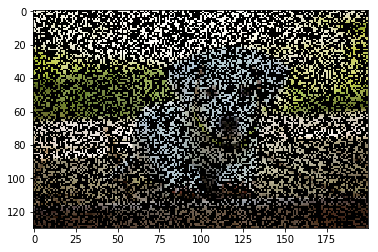

In [27]:
dog_im_ = dog_df_spec.reshape(doggo_.shape[0], doggo_.shape[1], 3)
imshow(np.asarray(dog_im_))

Very interesting results.

I tried using spectral clustering package on sklearn to segment the image, but my PC can't seem to run all the way without the kernel restarting. I will try a different clustering algorithm, Gaussian Mixture Model perhaps!

In [28]:
from sklearn.mixture import GaussianMixture

In [29]:
dog_GMM = GaussianMixture(n_components=3, random_state=0).fit(reshape_dog)
GMM_labels = dog_GMM.predict(reshape_dog)

In [30]:
dog_GMM_ = GMM_labels.reshape(len(GMM_labels),1)
re_dog_GMM = np.concatenate((reshape_dog, dog_GMM_), axis = 1)

dog_df_GMM = pd.DataFrame(re_dog_GMM)

dog_df_GMM.loc[dog_df_GMM[3] != 0, [0,1,2]] = 0

dog_df_GMM = dog_df_GMM.drop(columns = [3])
dog_df_GMM = dog_df_GMM.values

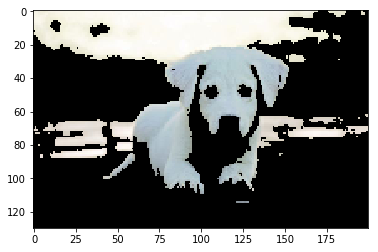

In [31]:
dog_im_1 = dog_df_GMM.reshape(doggo_.shape[0], doggo_.shape[1], 3)
imshow(np.asarray(dog_im_1))

Not what I expected, it looks like a k-means cluster... Time to use DBSCAN!

In [32]:
from sklearn.cluster import DBSCAN

In [33]:
dog_scan = DBSCAN(eps = 1, min_samples=140).fit(reshape_dog)
scan_labels = dog_scan.labels_

In [34]:
np.unique(scan_labels)

array([-1,  0,  1,  2,  3])

In [35]:
dog_scan_ = scan_labels.reshape(len(scan_labels),1)
re_dog_scan = np.concatenate((reshape_dog, dog_scan_), axis = 1)

dog_df_scan = pd.DataFrame(re_dog_scan)

dog_df_scan.loc[dog_df_scan[3] != 1, [0,1,2]] = 0

dog_df_scan = dog_df_scan.drop(columns = [3])
dog_df_scan = dog_df_scan.values

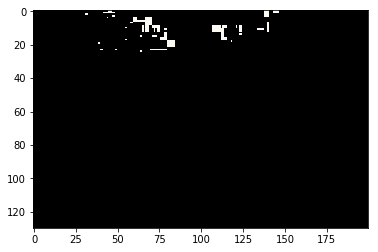

In [36]:
dog_im_2 = dog_df_scan.reshape(doggo_.shape[0], doggo_.shape[1], 3)
imshow(np.asarray(dog_im_2))

Interesting results to say the least. 


Next we will cluster more detailed images such as X-ray scans. These images came from the kaggle data set, "Chest X-Ray Images (Pneumonia)" https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

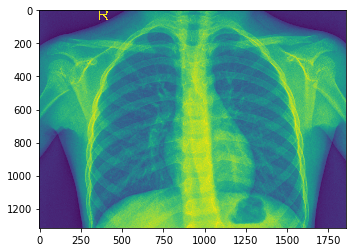

In [37]:
im2 = Image.open('normal.jpeg')
norm = im2.copy()
norm_ = np.asarray(im2)
imshow(norm_)

In [38]:
re_xray = (norm_.reshape(norm_.shape[0]*norm_.shape[1],1))

In [39]:
xray_GMM = GaussianMixture(n_components=3, random_state=0).fit(re_xray)
xray_labels = xray_GMM.predict(re_xray)

In [40]:
xray_GMM_ = xray_labels.reshape(len(xray_labels),1)
re_xray_GMM = np.concatenate((re_xray, xray_GMM_), axis = 1)

xray_df_GMM = pd.DataFrame(re_xray_GMM)

xray_df_GMM.loc[xray_df_GMM[1] != 1, [0]] = 0

xray_df_GMM = xray_df_GMM.drop(columns = [1])
xray_df_GMM = xray_df_GMM.values

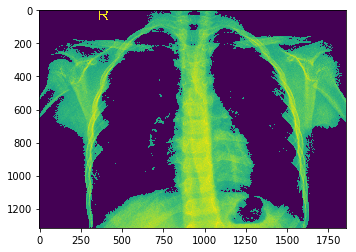

In [41]:
xray_im_1 = xray_df_GMM.reshape(norm_.shape[0], norm_.shape[1], )
imshow(np.asarray(xray_im_1))

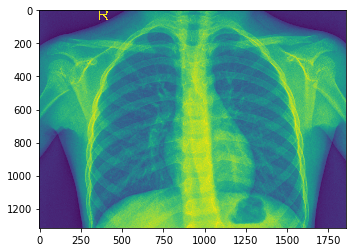

In [42]:
im3 = Image.open('viral.jpeg')
norm1 = im2.copy()
norm_1 = np.asarray(im2)
imshow(norm_1)

In [43]:
re_xray1 = (norm_1.reshape(norm_1.shape[0]*norm_1.shape[1],1))

In [44]:
xray_GMM1 = GaussianMixture(n_components=3, random_state=0).fit(re_xray1)
xray_labels1 = xray_GMM1.predict(re_xray1)

In [45]:
xray_GMM_1 = xray_labels1.reshape(len(xray_labels1),1)
re_xray_GMM1 = np.concatenate((re_xray1, xray_GMM_1), axis = 1)

xray_df_GMM1 = pd.DataFrame(re_xray_GMM1)

xray_df_GMM1.loc[xray_df_GMM1[1] != 0, [0]] = 0

xray_df_GMM1 = xray_df_GMM1.drop(columns = [1])
xray_df_GMM1 = xray_df_GMM1.values

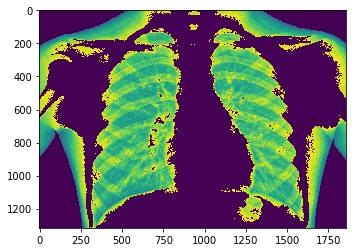

In [46]:
xray_im_11 = xray_df_GMM1.reshape(norm_1.shape[0], norm_1.shape[1], )
imshow(np.asarray(xray_im_11))